# BERT Sentiment Analysis Notebook

This notebook executes the BERT-based sentiment analysis pipeline and visualizes the results.

**Steps:**
1.  **Run Pipeline:** Execute the `BertSentimentAnalysis` pipeline to process text and calculate sentiment scores using DistilBERT.
2.  **Analyze Results:** Explore the distribution of sentiments across different banks.
3.  **Visualize:** Create charts to understand customer sentiment trends.

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add project root to path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.sentiment_bert import BertSentimentAnalysis
from src.config import DATA_PATHS

# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## 1. Run BERT Sentiment Analysis Pipeline

We will initialize and run the `BertSentimentAnalysis` pipeline. This will:
1.  Load the preprocessed data.
2.  Use the Hugging Face pipeline to predict sentiment on the GPU.
3.  Calculate continuous sentiment scores (-1 to 1).
4.  Save the results.

In [2]:
# Initialize and run the pipeline
analyzer = BertSentimentAnalysis()
success = analyzer.run_pipeline()

if success:
    print("Pipeline executed successfully.")
else:
    print("Pipeline failed.")

🚀 Using device: GPU (cuda:0)
Loading Sentiment Analysis Pipeline...


Device set to use cuda:0


STARTING BERT SENTIMENT ANALYSIS PIPELINE
Loading data from: ../data/processed/reviews_processed.csv
Preprocessing: Converting emojis to text...
✅ Loaded and preprocessed 9661 reviews.
Running inference on GPU...


100%|██████████| 9661/9661 [00:19<00:00, 502.91it/s]


Processing scores...
Saving results to: ../data/processed/reviews_with_sentiment_bert.csv
✅ Results saved successfully!
Pipeline executed successfully.


## 2. Data Analysis & Visualization

Now that we have the sentiment scores, let's analyze the results. We will look at the distribution of sentiments and explore some examples.

In [3]:
# Load the results
results_path = DATA_PATHS['sentiment_results_bert']
df_sentiment = pd.read_csv(results_path)

print(f"Loaded {len(df_sentiment)} analyzed reviews.")
df_sentiment.head()

Loaded 9661 analyzed reviews.


,review_id,review_text,rating,review_date,review_year,review_month,bank_code,bank_name,user_name,thumbs_up,text_length,source,sentiment_score,sentiment_label
0,3463230e-f9f7-4be3-a632-fdd8d017ce84,🙏👍,5,2025-11-29,2025,11,Abyssinia,Abyssinia Bank,Yasin Alemu,0,2,Google Play,-0.589517,negative
1,a6cbfa34-f2b1-4a16-96b6-c94f58cea76f,Very Good,5,2025-11-28,2025,11,Abyssinia,Abyssinia Bank,Wariyo Dida,0,9,Google Play,0.999852,positive
2,fc67d12c-92e2-45aa-a9e0-011f58a583bc,goof,5,2025-11-28,2025,11,Abyssinia,Abyssinia Bank,Hailegebrail Tegegn,0,4,Google Play,-0.997528,negative
3,11306fb9-5571-4950-8d32-604c5402242f,good!,5,2025-11-28,2025,11,Abyssinia,Abyssinia Bank,Tsegay ab,0,5,Google Play,0.999827,positive
4,809c46d2-730e-446a-9061-2a45e978ad9d,good jop,5,2025-11-27,2025,11,Abyssinia,Abyssinia Bank,Yohanis Fikadu,0,8,Google Play,0.999841,positive


C:\Users\yeget\AppData\Local\Temp\ipykernel_12872\1116808023.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sentiment, x='sentiment_label', order=['negative', 'neutral', 'positive'], palette='viridis')


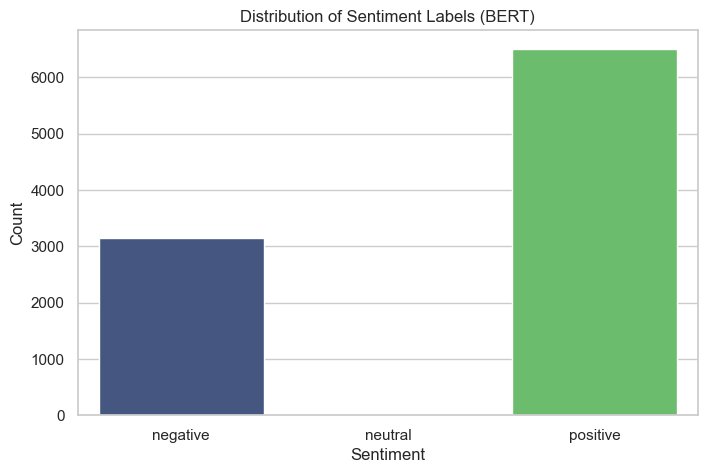

sentiment_label
positive    67.373978
negative    32.626022
Name: proportion, dtype: float64


In [4]:
# Sentiment Label Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_sentiment, x='sentiment_label', order=['negative', 'neutral', 'positive'], palette='viridis')
plt.title('Distribution of Sentiment Labels (BERT)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Print percentage distribution
print(df_sentiment['sentiment_label'].value_counts(normalize=True) * 100)

## Sentiment Distribution by Bank

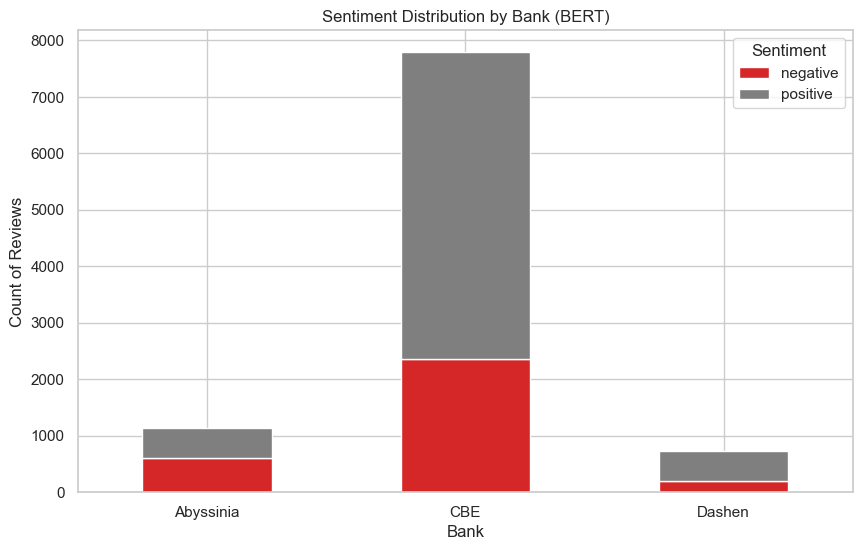

In [5]:
# Sentiment Distribution by Bank (Stacked Bar Chart)
# Create a cross-tabulation of Bank vs Sentiment
sentiment_by_bank = pd.crosstab(df_sentiment['bank_code'], df_sentiment['sentiment_label'])

# Reorder columns for logical stacking: Negative -> Neutral -> Positive
sentiment_by_bank = sentiment_by_bank[['negative', 'positive']]

# Plot stacked bar chart
sentiment_by_bank.plot(kind='bar', stacked=True, color=['#d62728', '#7f7f7f', '#2ca02c'], figsize=(10, 6))

plt.title('Sentiment Distribution by Bank (BERT)')
plt.xlabel('Bank')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.show()

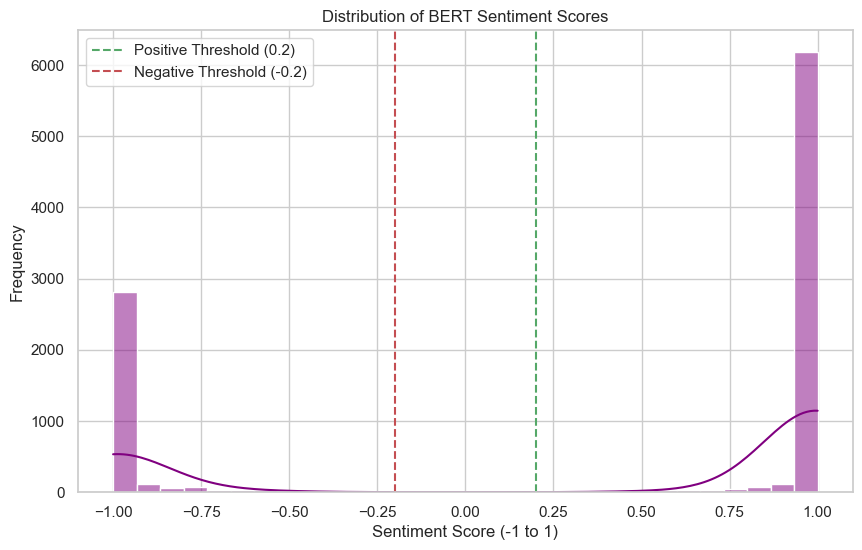

In [6]:
# Sentiment Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_sentiment['sentiment_score'], bins=30, kde=True, color='purple')
plt.title('Distribution of BERT Sentiment Scores')
plt.xlabel('Sentiment Score (-1 to 1)')
plt.ylabel('Frequency')
plt.axvline(x=0.2, color='g', linestyle='--', label='Positive Threshold (0.2)')
plt.axvline(x=-0.2, color='r', linestyle='--', label='Negative Threshold (-0.2)')
plt.legend()
plt.show()

In [7]:
# Sample Reviews
def print_samples(sentiment, n=3):
    print(f"\n--- Sample {sentiment.upper()} Reviews ---")
    samples = df_sentiment[df_sentiment['sentiment_label'] == sentiment]['review_text'].head(n)
    for i, text in enumerate(samples):
        print(f"{i+1}. {text}")

print_samples('positive')
print_samples('negative')
print_samples('neutral')


--- Sample POSITIVE Reviews ---
1. Very Good
2. good!
3. good jop

--- Sample NEGATIVE Reviews ---
1. 🙏👍
2. goof
3. bad exprience...it is so crushed

--- Sample NEUTRAL Reviews ---


## 3. Sentiment vs. Star Rating

We will analyze how the calculated BERT sentiment score correlates with the user's star rating (1-5 stars).

C:\Users\yeget\AppData\Local\Temp\ipykernel_12872\1475126365.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bank_data, x='rating', y='sentiment_score', ax=axes[i], palette='viridis')
C:\Users\yeget\AppData\Local\Temp\ipykernel_12872\1475126365.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bank_data, x='rating', y='sentiment_score', ax=axes[i], palette='viridis')
C:\Users\yeget\AppData\Local\Temp\ipykernel_12872\1475126365.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bank_data, x='rating', y='sentiment_scor

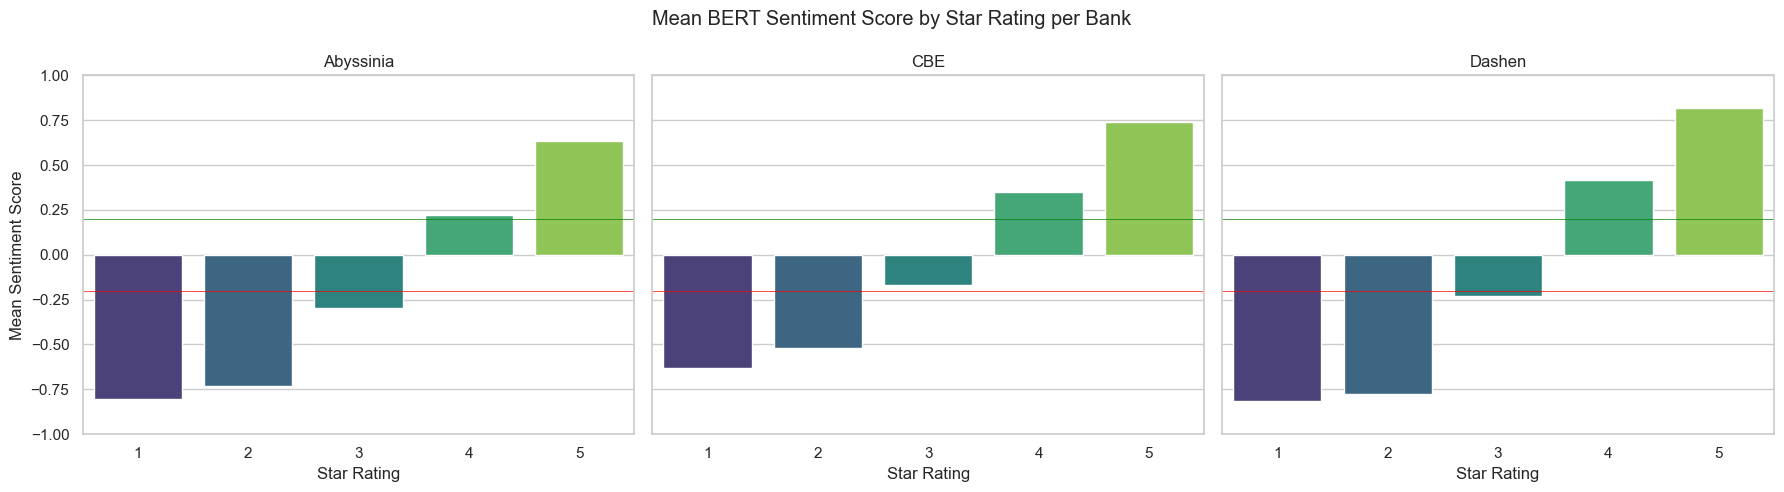

In [8]:
# Calculate mean sentiment score by Bank and Rating
sentiment_by_rating = df_sentiment.groupby(['bank_code', 'rating'])['sentiment_score'].mean().reset_index()

# Get unique banks
banks = df_sentiment['bank_code'].unique()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle('Mean BERT Sentiment Score by Star Rating per Bank')

for i, bank in enumerate(banks):
    # Filter data for the bank
    bank_data = sentiment_by_rating[sentiment_by_rating['bank_code'] == bank]
    
    # Plot
    sns.barplot(data=bank_data, x='rating', y='sentiment_score', ax=axes[i], palette='viridis')
    
    axes[i].set_title(bank)
    axes[i].set_xlabel('Star Rating')
    axes[i].set_ylabel('Mean Sentiment Score')
    axes[i].axhline(0.2, color='green', linewidth=0.5) # Positive threshold
    axes[i].axhline(-0.2, color='red', linewidth=0.5) # Negative threshold
    axes[i].set_ylim(-1, 1)

plt.tight_layout()
plt.show()

## 4. Time Series Analysis of Sentiment Scores

Let's see how sentiment scores have evolved over time for each bank using BERT scores.

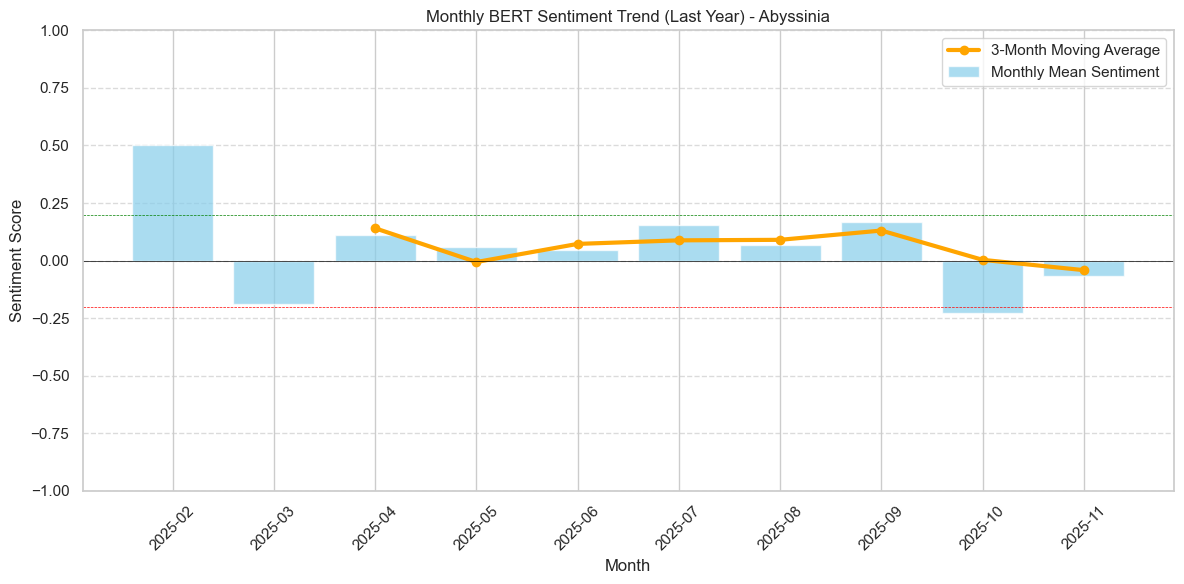

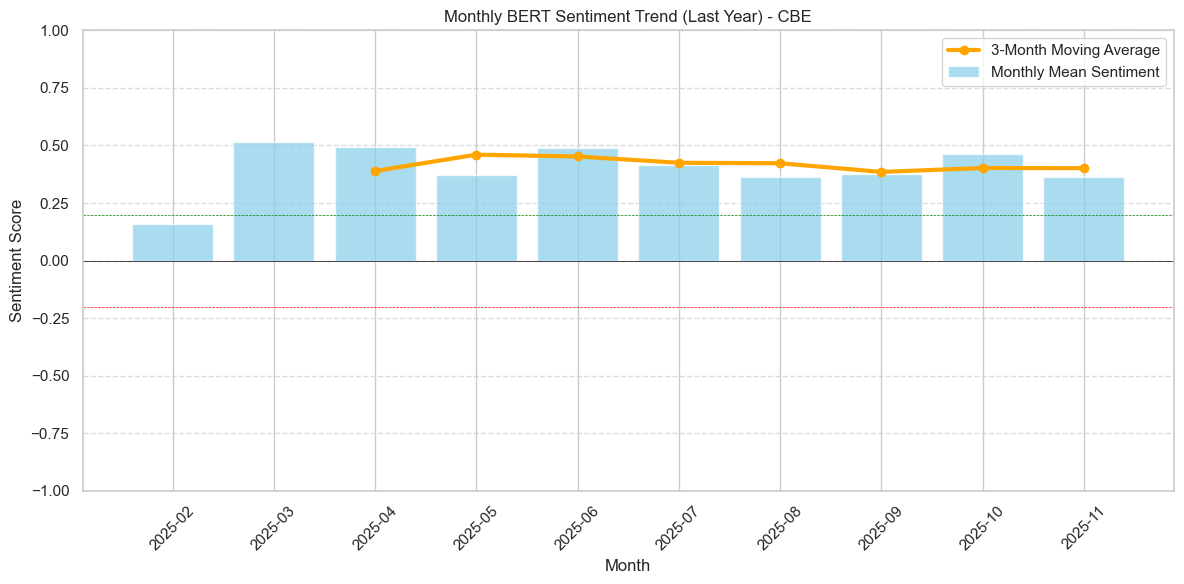

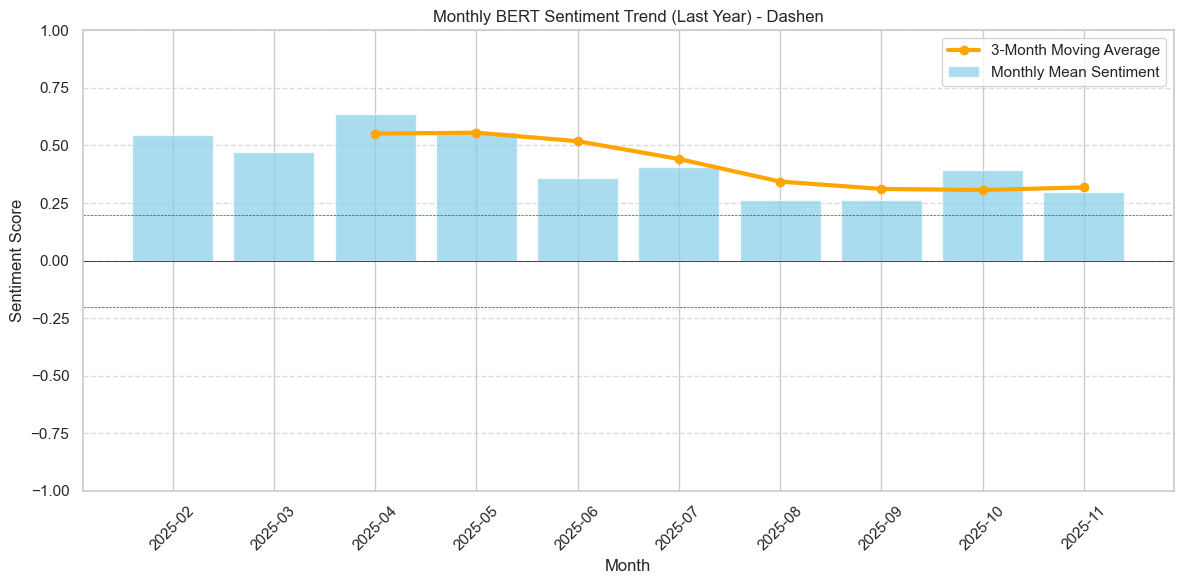

In [9]:
# Monthly Average Sentiment with Moving Average Trend
df_sentiment['review_date'] = pd.to_datetime(df_sentiment['review_date'])
one_year_ago = pd.Timestamp.now() - pd.DateOffset(years=1)
df_last_year = df_sentiment[df_sentiment['review_date'] >= one_year_ago].copy()

# Set review_date as index for resampling
df_last_year.set_index('review_date', inplace=True)

for bank in banks:
    # Filter for bank
    bank_data = df_last_year[df_last_year['bank_code'] == bank]
    
    # Resample to monthly mean
    monthly_sentiment = bank_data['sentiment_score'].resample('ME').mean()
    
    # Calculate 3-month rolling average (Moving Average)
    rolling_avg = monthly_sentiment.rolling(window=3).mean()
    
    # Plot
    plt.figure(figsize=(12, 6))
    
    # Bar chart for Monthly Average
    x_dates = monthly_sentiment.index.strftime('%Y-%m')
    plt.bar(x_dates, monthly_sentiment, color='skyblue', alpha=0.7, label='Monthly Mean Sentiment')
    
    # Line chart for Moving Average
    plt.plot(x_dates, rolling_avg, color='orange', linewidth=3, marker='o', label='3-Month Moving Average')
    
    plt.title(f'Monthly BERT Sentiment Trend (Last Year) - {bank}')
    plt.xlabel('Month')
    plt.ylabel('Sentiment Score')
    plt.ylim(-1, 1)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axhline(0.2, color='green', linestyle='--', linewidth=0.5)
    plt.axhline(-0.2, color='red', linestyle='--', linewidth=0.5)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

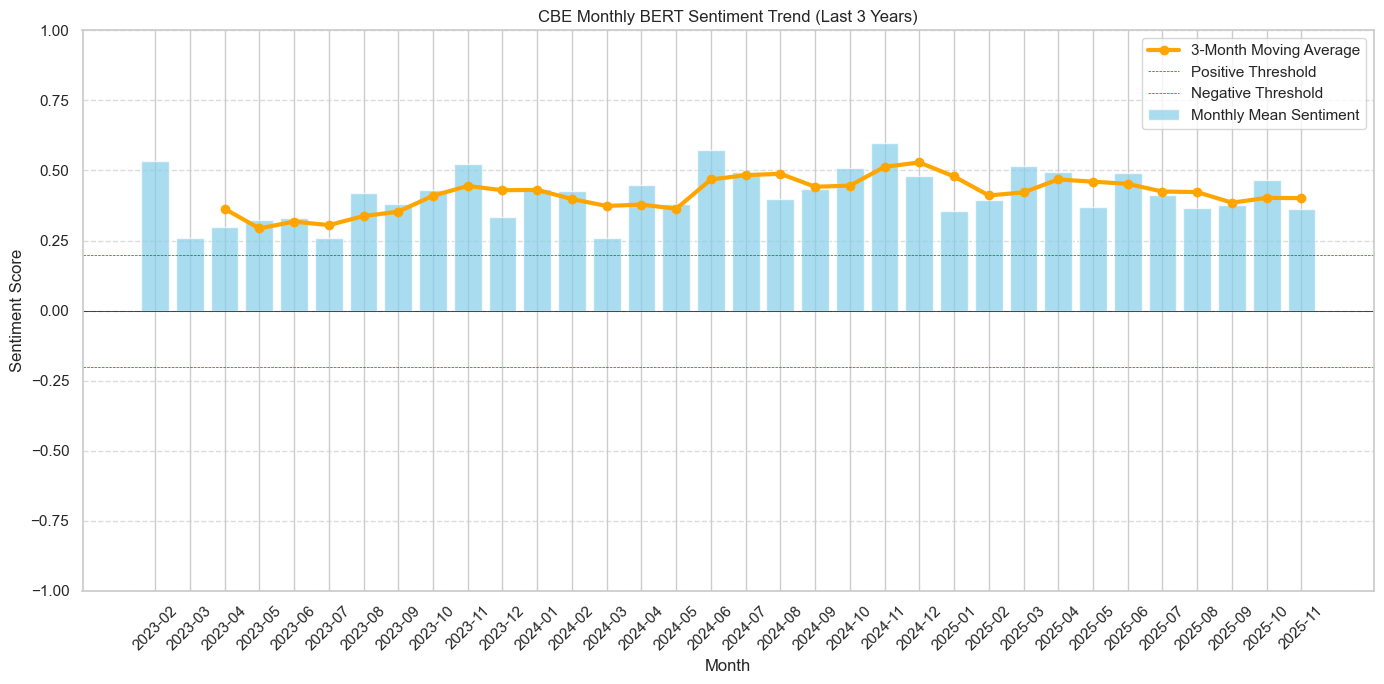

In [10]:
# CBE Sentiment Trend (Last 3 Years)
cbe_data = df_sentiment[df_sentiment['bank_code'] == 'CBE'].copy()
cbe_data['review_date'] = pd.to_datetime(cbe_data['review_date'])
cbe_data.set_index('review_date', inplace=True)

# Filter for last 3 years
three_years_ago = pd.Timestamp.now() - pd.DateOffset(years=3)
cbe_last_3_years = cbe_data[cbe_data.index >= three_years_ago]

# Resample to monthly mean
monthly_sentiment_cbe = cbe_last_3_years['sentiment_score'].resample('ME').mean()

# Calculate 3-month rolling average
rolling_avg_cbe = monthly_sentiment_cbe.rolling(window=3).mean()

# Plot
plt.figure(figsize=(14, 7))

# Bar chart for Monthly Average
x_dates_cbe = monthly_sentiment_cbe.index.strftime('%Y-%m')
plt.bar(x_dates_cbe, monthly_sentiment_cbe, color='skyblue', alpha=0.7, label='Monthly Mean Sentiment')

# Line chart for Moving Average
plt.plot(x_dates_cbe, rolling_avg_cbe, color='orange', linewidth=3, marker='o', label='3-Month Moving Average')

plt.title('CBE Monthly BERT Sentiment Trend (Last 3 Years)')
plt.xlabel('Month')
plt.ylabel('Sentiment Score')
plt.ylim(-1, 1)
plt.axhline(0, color='black', linewidth=0.5)
plt.axhline(0.2, color='green', linestyle='--', linewidth=0.5, label='Positive Threshold')
plt.axhline(-0.2, color='red', linestyle='--', linewidth=0.5, label='Negative Threshold')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()